<a href="https://colab.research.google.com/github/dipakpatil2001/Zomato-Restaurant-Clustering-And-Sentiment-Analysis-Unsupervised-ML/blob/main/Zomato_Restaurant_Clustering_And_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Zomato Restaurant Clustering And Sentiment Analysis



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -**  Dipak Balram Patil

# **Project Summary -**

Business Context


---


Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities. India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.


**There are two files of dataset, while the columns are self explanatory. Below is a brief description:**

> **Zomato Restaurant names and Metadata**

Name : Name of Restaurants

Links : URL Links of Restaurants

Cost : Per person estimated Cost of dining

Collection : Tagging of Restaurants w.r.t. Zomato categories

Cuisines : Cuisines served by Restaurants

Timings : Restaurant Timings


> **Zomato Restaurant reviews**

Restaurant : Name of the Restaurant

Reviewer : Name of the Reviewer

Review : Review Text

Rating : Rating Provided by Reviewer

MetaData : Reviewer Metadata - No. of Reviews and followers

Time: Date and Time of Review

Pictures : No. of pictures posted with review


>Restaurant names and Metadata - This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis Restaurant reviews - Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry.




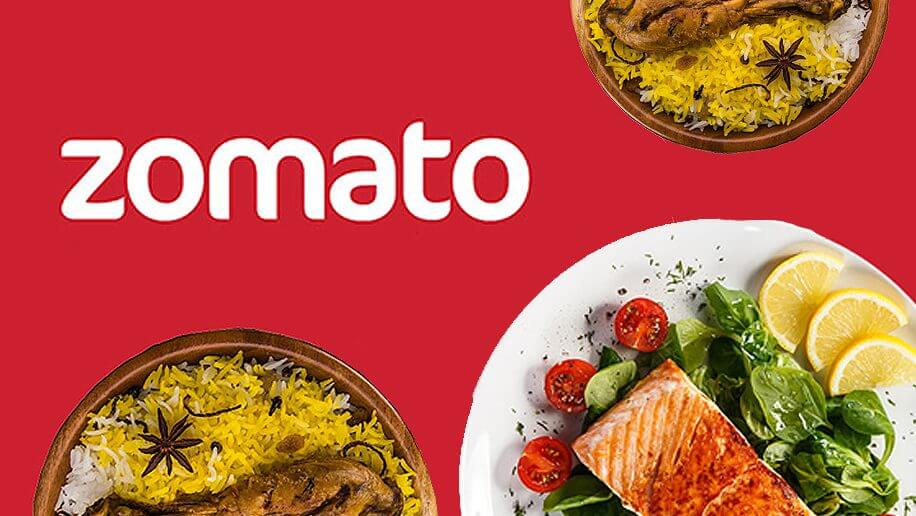

# **GitHub Link -**

Provide your GitHub Link here. [Zomato-Restaurant-Clustering-And-Sentiment-Analysis-Unsupervised-ML](https://github.com/dipakpatil2001/Zomato-Restaurant-Clustering-And-Sentiment-Analysis-Unsupervised-ML/tree/main)

# **Problem Statement**


The Project focuses on Customers and Company, you have to analyze the sentiments of the reviews given by the customer in the data and make some useful conclusions in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solves some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

**This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis.**

**Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [349]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud

import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import PorterStemmer, LancasterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from textblob import TextBlob
from IPython.display import Image
from gensim import corpora
from gensim.models import LdaModel
from gensim.utils import simple_preprocess

import gensim
from gensim import corpora
from gensim.models import LdaModel
from gensim.utils import simple_preprocess

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [350]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [351]:
# Load Dataset
meta_df_res = pd.read_csv('/content/drive/MyDrive/CD/Data science /Projects and all/Zomato Restaurant names and Metadata.csv') # Zomato Restaurant names and Metadata
meta_df=meta_df_res.copy()
rev_df = pd.read_csv('/content/drive/MyDrive/CD/Data science /Projects and all/Zomato Restaurant reviews.csv')             # Zomato Restaurant reviews

### Dataset First View

In [352]:
# Dataset First Look
meta_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [353]:
rev_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


### Dataset Rows & Columns count

In [354]:
# Dataset Rows & Columns count
print( f'Dataset \033[4mZomato Restaurant names and Metadata\033[0m contains \033[1m{meta_df.shape[0]}\033[0m rows and \033[1m{meta_df.shape[1]}\033[0m columns.')
print( f'Dataset \033[4mZomato Restaurant reviews\033[0m contains \033[1m{rev_df.shape[0]}\033[0m rows and \033[1m{rev_df.shape[1]}\033[0m  columns.')

Dataset Zomato Restaurant names and Metadata contains 105 rows and 6 columns.
Dataset Zomato Restaurant reviews contains 10000 rows and 7  columns.


### Dataset Information

In [355]:
# Dataset Info of Zomato Restaurant names and Metadata
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [356]:
# Dataset Info of Zomato Restaurant reviews
rev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


#### Duplicate Values

In [357]:
# Dataset Duplicate Value Count in Zomato Restaurant names and Metadata
meta_df.duplicated().sum()

0

In [358]:
# Checking duplicate restaurant name.
meta_df['Name'].duplicated().sum()

0

In [359]:
# Dataset Duplicate Value Count in Zomato Restaurant reviews
rev_df.duplicated().sum()

36

#### Missing Values/Null Values

In [360]:
# Missing Values/Null Values Count
meta_df.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [361]:
rev_df.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

In [362]:
for dataset in (meta_df, rev_df):
  print(dataset.shape)

(105, 6)
(10000, 7)


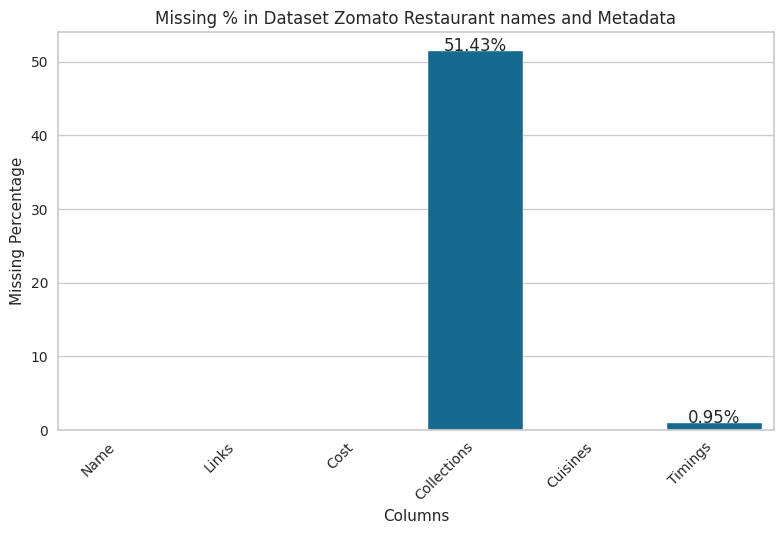

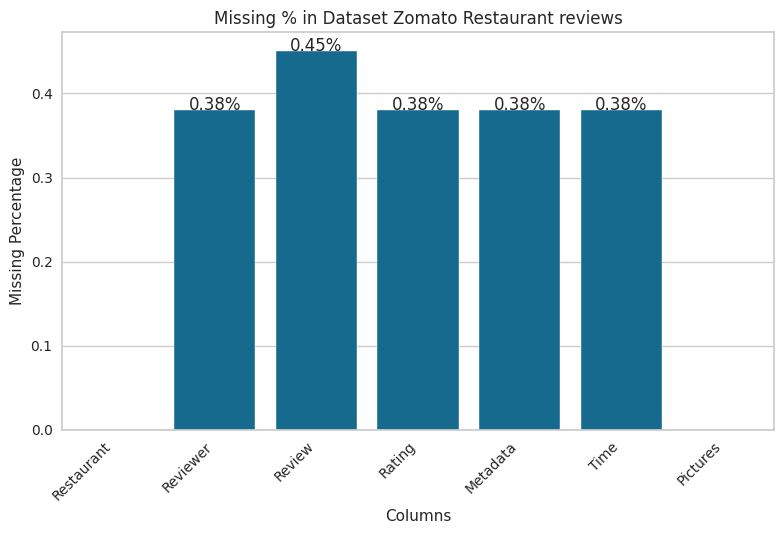

In [363]:
# Visualizing the missing values
count=0
for dataset in (meta_df, rev_df):
  missing_percentage = dataset.isnull().sum()/dataset.shape[0] *100
  # missing_percentage.plot(kind='bar', color='skyblue')
  sns.barplot(x=missing_percentage.index, y=missing_percentage.values)
  plt.xlabel('Columns')
  plt.ylabel('Missing Percentage')
  if count == 0:
    plt.title(f'Missing % in Dataset Zomato Restaurant names and Metadata')
    count +=1
  else:
    plt.title(f'Missing % in Dataset Zomato Restaurant reviews')

  plt.xticks(rotation=45, ha='right')

  # Adding annotations on top of the bars
  for index, value in enumerate(missing_percentage.values):
    if value > 0: # Only annotate bars with missing values
        plt.text(index, value, f'{value:.2f}%', ha='center')

  plt.tight_layout()
  plt.show()

* For meta data: Our data has missing values in collection column. Since the column contains sentiments hence no need to impute the null values. There are 105 total observation with 6 different features.
Feature like collection and timing has null values.
There is no duplicate values i.e., 105 unique data.
Feature cost represent amount but has object data type because these values are separated by comma ','.
Timing represent operational hour but as it is represented in the form of text has object data type.

* For Review Data: As we can see, there are few missing values, so I decide to drop them all because there isn't a big loss



## ***2. Understanding Your Variables***

In [364]:
# Dataset Columns
print(f'Columns in Zomato Restaurant names and Metadata: {meta_df.columns.tolist()}')
print(f'Columns in Zomato Restaurant reviews: {rev_df.columns.tolist()}')

Columns in Zomato Restaurant names and Metadata: ['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings']
Columns in Zomato Restaurant reviews: ['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time', 'Pictures']


In [365]:
# Dataset Describe
meta_df.describe()

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


In [366]:
rev_df.describe()

,Pictures
count,10000.000000
mean,0.748600
std,2.570381
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,64.000000


In [367]:
meta_df.head(2)

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM


In [368]:
rev_df.head(1)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0


### Variables Description

## **Zomato Restaurant names and Metadata**


1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

## **Zomato Restaurant reviews**


1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

### Check Unique Values for each variable.

In [369]:
# Check Unique Values for each variable.
print(meta_df.nunique())
print(20*"_")
print(rev_df.nunique())

Name           105
Links          105
Cost            29
Collections     42
Cuisines        92
Timings         77
dtype: int64
____________________
Restaurant     100
Reviewer      7446
Review        9364
Rating          10
Metadata      2477
Time          9782
Pictures        36
dtype: int64


In [370]:
meta_df.apply(lambda x: x.unique())

Name           [Beyond Flavours, Paradise, Flechazo, Shah Gho...
Links          [https://www.zomato.com/hyderabad/beyond-flavo...
Cost           [800, 1,300, 1,200, 1,500, 500, 300, 1,000, 35...
Collections    [Food Hygiene Rated Restaurants in Hyderabad, ...
Cuisines       [Chinese, Continental, Kebab, European, South ...
Timings        [12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)...
dtype: object

In [371]:
rev_df.apply(lambda x: x.unique())

Restaurant    [Beyond Flavours, Paradise, Flechazo, Shah Gho...
Reviewer      [Rusha Chakraborty, Anusha Tirumalaneedi, Asho...
Review        [The ambience was good, food was quite good . ...
Rating           [5, 4, 1, 3, 2, 3.5, 4.5, 2.5, 1.5, Like, nan]
Metadata      [1 Review , 2 Followers, 3 Reviews , 2 Followe...
Time          [5/25/2019 15:54, 5/25/2019 14:20, 5/24/2019 2...
Pictures      [0, 8, 1, 7, 2, 6, 3, 5, 9, 4, 16, 26, 10, 15,...
dtype: object

## 3. ***Data Wrangling***

### Data Wrangling Code

In [372]:
meta_df.shape  # current size of Meta data

(105, 6)

In [373]:
meta_df['Cost'].dtype

dtype('O')

In [374]:
# Write your code to make your dataset analysis ready.
# Convert the 'Cost' column, deleting the comma and changing the data type into 'int64'.
meta_df['Cost'] =  meta_df['Cost'].str.replace(",","").astype('int64')

Convert the 'Cost' column, deleting the comma and changing the data type into 'int64'

In [375]:
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    int64 
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: int64(1), object(5)
memory usage: 5.0+ KB


In [376]:
rev_df.shape # current size of Review Data

(10000, 7)

In [377]:
# missing values in review data
null_info = pd.DataFrame({'Feature': rev_df.columns,
                          'Count':rev_df.isnull().sum(),
                          'Percentage':rev_df.isnull().sum()/rev_df.shape[0]*100})
null_info = null_info.reset_index(drop=True)
null_info

,Feature,Count,Percentage
0,Restaurant,0,0.00
1,Reviewer,38,0.38
2,Review,45,0.45
3,Rating,38,0.38
4,Metadata,38,0.38
5,Time,38,0.38
6,Pictures,0,0.00


As we can see, there are few missing values, so I decide to drop them all because there isn't a big loss

In [378]:
rev_df.dropna(inplace =True)
rev_df.isnull().sum()

Restaurant    0
Reviewer      0
Review        0
Rating        0
Metadata      0
Time          0
Pictures      0
dtype: int64

In [379]:
rev_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9955 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  9955 non-null   object
 1   Reviewer    9955 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9955 non-null   object
 4   Metadata    9955 non-null   object
 5   Time        9955 non-null   object
 6   Pictures    9955 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 622.2+ KB


This notebook will use bokeh and plotly to see ratings, reviews and cost relationships , will use NLTK,gensim, to convert text to vectors to find relationships between text. We will also see wordclouds.

In [380]:
rev_df.Rating.value_counts()

5       3826
4       2373
1       1735
3       1192
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

In [381]:
# proportion of occurrences for each unique value in the Rating column.
rev_df['Rating'].value_counts(normalize=True)

5       0.384329
4       0.238373
1       0.174284
3       0.119739
2       0.068709
4.5     0.006931
3.5     0.004721
2.5     0.001909
1.5     0.000904
Like    0.000100
Name: Rating, dtype: float64

In [382]:
# Removing like value and taking the mean in the rating column.
rev_df.loc[rev_df['Rating'] == 'Like'] = np.nan

 # Chenging the data type of rating column
rev_df['Rating']= rev_df['Rating'].astype('float64')

print(rev_df['Rating'].mean())

3.600261201527024


In [383]:
rev_df.isna().sum()

Restaurant    1
Reviewer      1
Review        1
Rating        1
Metadata      1
Time          1
Pictures      1
dtype: int64

In [384]:
# Filling mean in place of null value
rev_df['Rating'].fillna(3.6, inplace=True)

In [385]:
# Changing the data type of review column.
rev_df['Review'] = rev_df['Review'].astype(str)

# Creating a review_length column to check the frequency of each rating.
rev_df['Review_length'] = rev_df['Review'].apply(len)

In [386]:
rev_df['Rating'].value_counts(normalize=True)

5.0    0.384329
4.0    0.238373
1.0    0.174284
3.0    0.119739
2.0    0.068709
4.5    0.006931
3.5    0.004721
2.5    0.001909
1.5    0.000904
3.6    0.000100
Name: Rating, dtype: float64

In [387]:
rev_df['Rating'].describe()

count    9955.000000
mean        3.600261
std         1.483498
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: Rating, dtype: float64

The Ratings distribution 38% reviews are 5 rated,23% are 4 rated stating that people do rate good food high.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

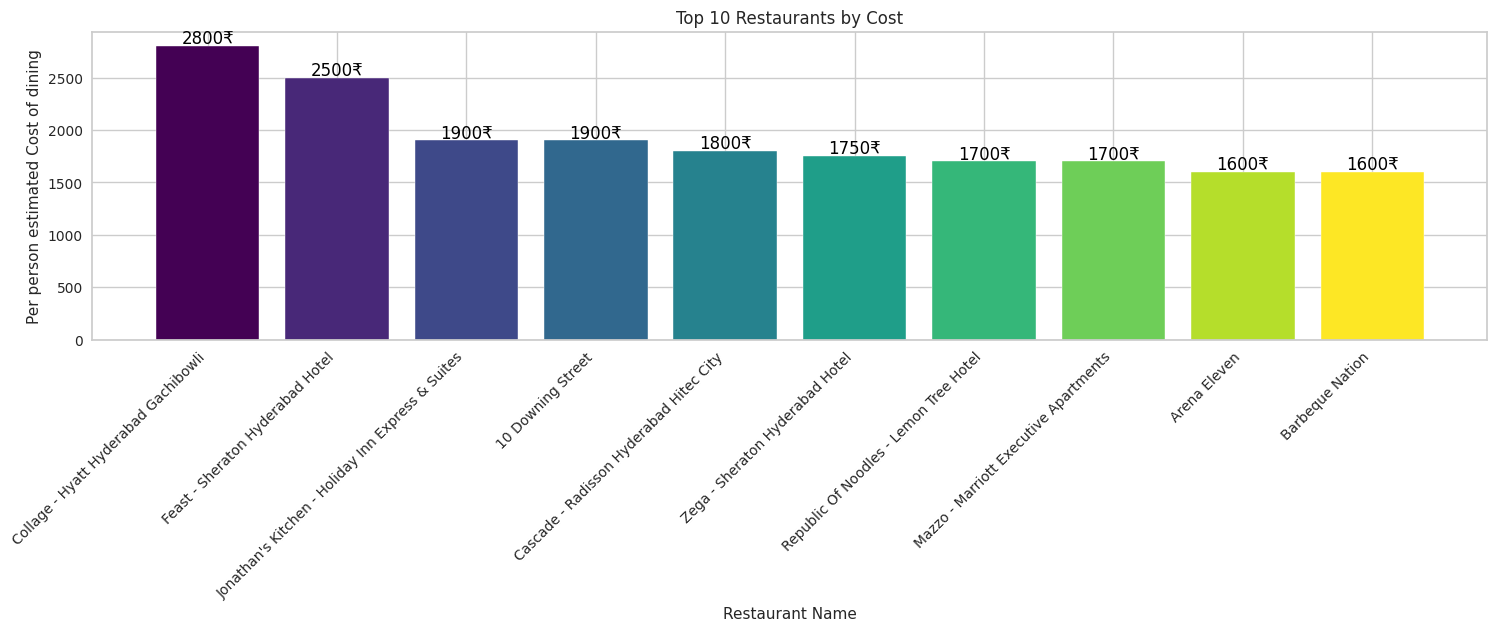

In [388]:
# Chart - 1 visualization code
# top 10 restaurants by cost
top10_res_by_cost = meta_df[['Name', 'Cost']].sort_values(by='Cost', ascending=False).head(10).reset_index(drop=True)
# Plotting a colorful bar chart for the top 10 restaurants by cost
plt.figure(figsize=(18, 4))

# Define colors using a colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(top10_res_by_cost)))

# Plotting the bars with different colors
bars = plt.bar(top10_res_by_cost['Name'], top10_res_by_cost['Cost'], color=colors)

# # Adding a colorbar for reference
# cbar = plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'))
# cbar.set_label('Total Cost')

plt.xlabel('Restaurant Name')
plt.ylabel('Per person estimated Cost of dining')
plt.title('Top 10 Restaurants by Cost')
plt.xticks(rotation=45, ha='right')
plt.xticks(size = 10)

# Adding values on top of the bars for better visibility
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 25,
             f'{round(bar.get_height(), 2)}₹', ha='center', color='black')

plt.show()


##### 1. Why did you pick the specific chart?

The colorful bar chart was chosen for its effectiveness in visually comparing the total costs of the top 10 restaurants. Bar charts are well-suited for representing categorical data with numerical values, and the addition of color provides a visually appealing and easily interpretable way to differentiate between restaurant costs. The rotated x-axis labels improve readability, making it a suitable choice for conveying insights about the relative expenses of each restaurant in a concise and visually impactful manner.

##### 2. What is/are the insight(s) found from the chart?

The colorful bar chart visually highlights the varying total costs of the top 10 restaurants. It reveals distinct cost differences among the establishments, allowing for quick identification of higher and lower-cost options. The color variation adds emphasis to these distinctions, aiding in the clear interpretation of relative expenses for each restaurant.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


The insights gained from the colorful bar chart, showcasing varying total costs among the top 10 restaurants, can potentially contribute to positive business impact. Identifying high-cost and low-cost performers allows businesses to strategize pricing, optimize offerings, and understand market positioning. However, negative growth may occur if the insights reveal disproportionately high costs without corresponding value or if lower-cost options are perceived negatively in terms of quality. Adjusting pricing strategies or addressing perceived value discrepancies could mitigate potential negative impacts and foster positive growth.

#### Chart - 2

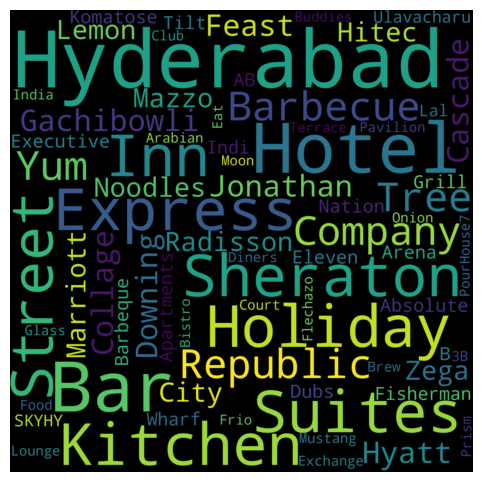

In [389]:
# Chart - 2 visualization code
plt.figure(figsize=(12,6))
text = " ".join(name for name in meta_df.sort_values('Cost',ascending=False).Name[:30])

# Creating word_cloud with text as argument in .generate() method.
word_cloud = WordCloud(width=2160, height= 2160, collocations=False, background_color='black').generate(text)

# Display the generated Word Cloud.
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off");

##### 1. Why did you pick the specific chart?

Word Cloud is chosen based on its ability to visually represent the frequency of restaurant names in a visually engaging and informative manner. It's particularly suitable for conveying the prominence of specific restaurants within the provided text.

##### 2. What is/are the insight(s) found from the chart?

In summary, the Word Cloud visualization of restaurant names provides the following insights:

* Prominence of Specific Restaurants:

Larger and bolder words indicate the prominence of specific restaurants, suggesting that they are mentioned more frequently or have higher costs compared to others.
* Diversity in Options:

The Word Cloud showcases a diverse range of restaurant names, reflecting the variety of options mentioned in the text.
*Identification of Key Players:

Viewers can easily identify key players or popular choices based on the size and prominence of the restaurant names in the Word Cloud.
* Engaging and Visual Representation:

The Word Cloud offers an engaging and visually appealing representation of the data, making it easy for viewers to explore and interpret.
* Potential Focus on High-Cost Restaurants:

If generated based on costs, the Word Cloud highlights high-cost restaurants, aiding in the identification of establishments contributing significantly to the total cost.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Bussiness Impact:**

Identification of popular restaurants can inform targeted marketing efforts and promotions.

Understanding customer preferences allows businesses to tailor offerings to meet expectations.

Opportunities for strategic partnerships or collaborations with key players may arise.

Informed operational decisions, such as optimizing inventory and staffing, can enhance efficiency.

**Considerations for Challenges:**

Overemphasis on a few prominent restaurants may limit diversity in offerings.

Ensuring customer satisfaction remains crucial, even with popular options.

Pricing strategies should align with market trends and competitive landscapes.

Adaptability to evolving market trends is essential for sustained growth.

#### Chart - 3

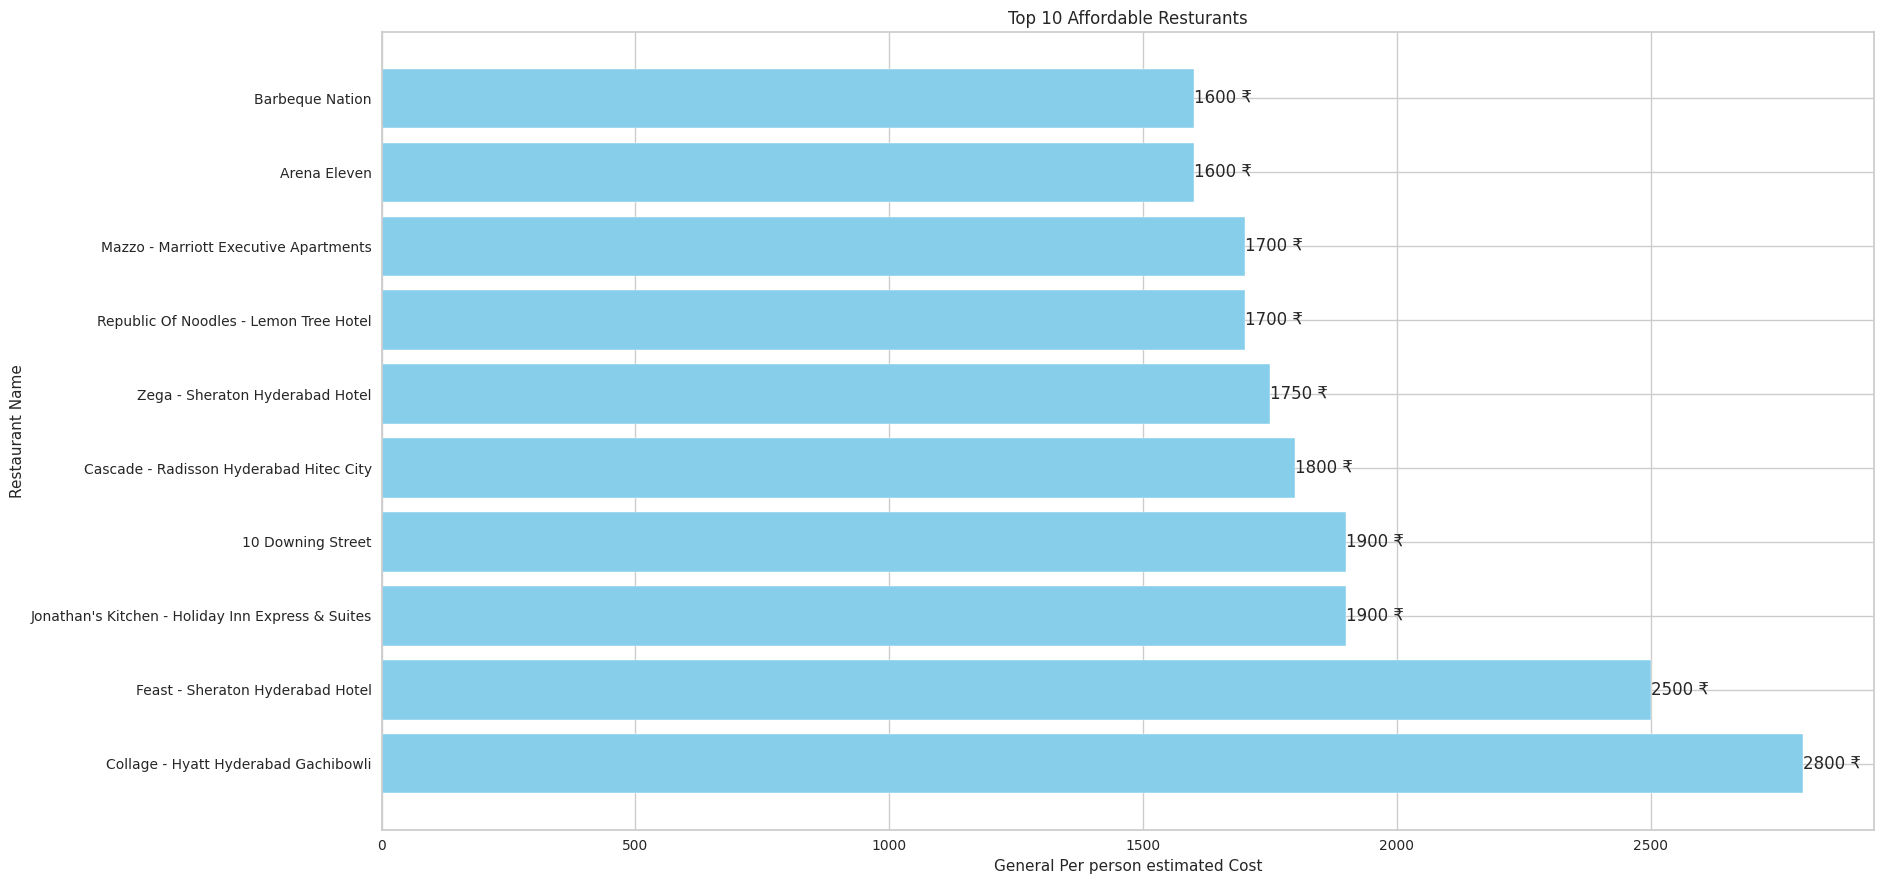

In [390]:
# Chart - 3 visualization code
top_10_affor_rest=meta_df[['Name', 'Cost']].sort_values(by='Cost', ascending=False).head(10).reset_index(drop=True).tail(10)

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming meta_df is your DataFrame
plt.figure(figsize=(19,9))
bars = plt.barh(top_10_affor_rest['Name'], top_10_affor_rest['Cost'], color='skyblue')

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f"{bar.get_width()} ₹", ha='left', va='center')

plt.xlabel('General Per person estimated Cost')
plt.ylabel('Restaurant Name')
plt.title('Top 10 Affordable Resturants')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

The choice of a horizontal bar chart for visualizing the top 10 affordable restaurants is based on its effectiveness in:

Comparing Values: The layout allows for a clear comparison of 'Cost' values among different restaurants.

Top-N Analysis: It is well-suited for displaying the top 10 affordable restaurants.

Readability: Horizontal bars accommodate longer category names, ensuring readability.

Sequential Order: The horizontal layout naturally orders bars based on 'Cost,' aiding intuitive interpretation.

Cost Annotations: Placement of cost annotations is convenient at the end of each bar.

Visual Appeal: Bar charts are visually appealing and widely used for comparative data presentation.

##### 2. What is/are the insight(s) found from the chart?


1.   Identification of most affordable options.
2. Comparison of affordability among restaurants.
3. Showcase of a diverse range of affordable choices.
4. Display of individual cost breakdown for each restaurant.
5. Recognition of prominent affordable restaurants.
6. Decision support for customers seeking budget-friendly options.
7. Potential marketing insights for restaurant owners and marketers.




##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

Targeted Marketing Opportunities.
Customer Retention and Loyalty.
Operational Efficiency.
Competitive Positioning.

**Potential Challenges and Negative Growth:**

Overemphasis on a Few Options.
Pricing Strategy Mismatch.
Failure to Adapt to Trends.
Inadequate Marketing Execution.
Customer Dissatisfaction.

## Text preprocessing for the meta dataset.

In Order to plot the cuisines from the data we should count the frequency of the words from the document.(Frequency of cuisine). For that We have to perform the opration like removing stop words, Convert all the text into lower case, removing punctuations, removing repeated charactors, removing Numbers and emojies and finally count vectorizer.

In [391]:
meta_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,1300,"Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,1200,"Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [392]:
# Downloading and importing the dependancies for text cleaning.
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [393]:
# Extracting the stopwords from nltk library for English corpus.
sw = (stopwords.words('english'))
print(sw) # stop words in english

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [394]:
# Creating a function for removing stopwords.
def stopwords(text):
  text = [word.lower() for word in str(text).split() if word.lower() not in sw]
  # joining the list of words with space separator
  return " ".join(text)

In [395]:
# Removing stopwords from Cuisines.
meta_df['Cuisines'] = meta_df['Cuisines'].apply(lambda x: stopwords(x))
meta_df.Cuisines.head()

0    chinese, continental, kebab, european, south i...
1                       biryani, north indian, chinese
2         asian, mediterranean, north indian, desserts
3    biryani, north indian, chinese, seafood, bever...
4    asian, continental, north indian, chinese, med...
Name: Cuisines, dtype: object

We removed stop words successfully!!

In [396]:
# Defining the function for removing punctuation.
def remove_punctuation(text):
    import string
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [397]:
# Removing punctuation from Cuisines.
meta_df['Cuisines'] = meta_df['Cuisines'].apply(lambda x: remove_punctuation(x))

meta_df['Cuisines'].head()

0    chinese continental kebab european south india...
1                         biryani north indian chinese
2            asian mediterranean north indian desserts
3       biryani north indian chinese seafood beverages
4    asian continental north indian chinese mediter...
Name: Cuisines, dtype: object

We removed Punctuations present in the text successfully!!

In [398]:
# Cleaning and removing Numbers.
# Writing a function to remove repeating characters.
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)

In [399]:
# def remove_repeating_characters(input_str):
#     result_str = ""
#     for char in input_str:
#         # If the current character is not already in the result string, add it
#         if char not in result_str:
#             result_str += char
#     return result_str

In [400]:
# meta_df['Cuisines'] = meta_df['Cuisines'].apply(lambda x: remove_repeating_characters(x))
# meta_df['Cuisines'].head()

In [401]:
# Removing repeating characters from Cuisines.
meta_df['Cuisines'] = meta_df['Cuisines'].apply(lambda x: cleaning_repeating_char(x))
meta_df['Cuisines'].head()

0    chinese continental kebab european south india...
1                         biryani north indian chinese
2            asian mediterranean north indian desserts
3       biryani north indian chinese seafood beverages
4    asian continental north indian chinese mediter...
Name: Cuisines, dtype: object

Removed repeated characters successfully!!

In [402]:
# Removing the Numbers from the data.
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

In [403]:
# Implementing the cleaning.
meta_df['Cuisines'] = meta_df['Cuisines'].apply(lambda x: cleaning_numbers(x))
meta_df['Cuisines'].head()

0    chinese continental kebab european south india...
1                         biryani north indian chinese
2            asian mediterranean north indian desserts
3       biryani north indian chinese seafood beverages
4    asian continental north indian chinese mediter...
Name: Cuisines, dtype: object

We dont want numbers in the text Hence removed number successfully!!

In [404]:
# Top 20 Two word Frequencies of Cuisines.
from collections import Counter
text = ' '.join(meta_df['Cuisines'])

# separating each word from the sentences
words = text.split()
# Extracting the first word from the number for cuisines in the sentence.
two_words = {' '.join(words):n for words,n in Counter(zip(words, words[1:])).items() if not  words[0][-1]==(',')}

In [405]:
# Extracting the most frequent cuisine present in the collection.
# Counting a frequency for cuisines.
two_words_dfc = pd.DataFrame(two_words.items(), columns=['Cuisine Words', 'Frequency'])

# Sorting the most frequent cuisine at the top and order by descending
two_words_dfc = two_words_dfc.sort_values(by = "Frequency", ascending = False)

# selecting first top 20 frequent cuisine.
two_words_20c = two_words_dfc.iloc[:20]
two_words_20c

,Cuisine Words,Frequency
6,north indian,61
9,indian chinese,27
42,fast food,15
4,south indian,9
5,indian north,9
33,chinese north,8
24,indian continental,6
65,italian north,6
8,biryani north,6
28,food north,6


#### Chart - 4

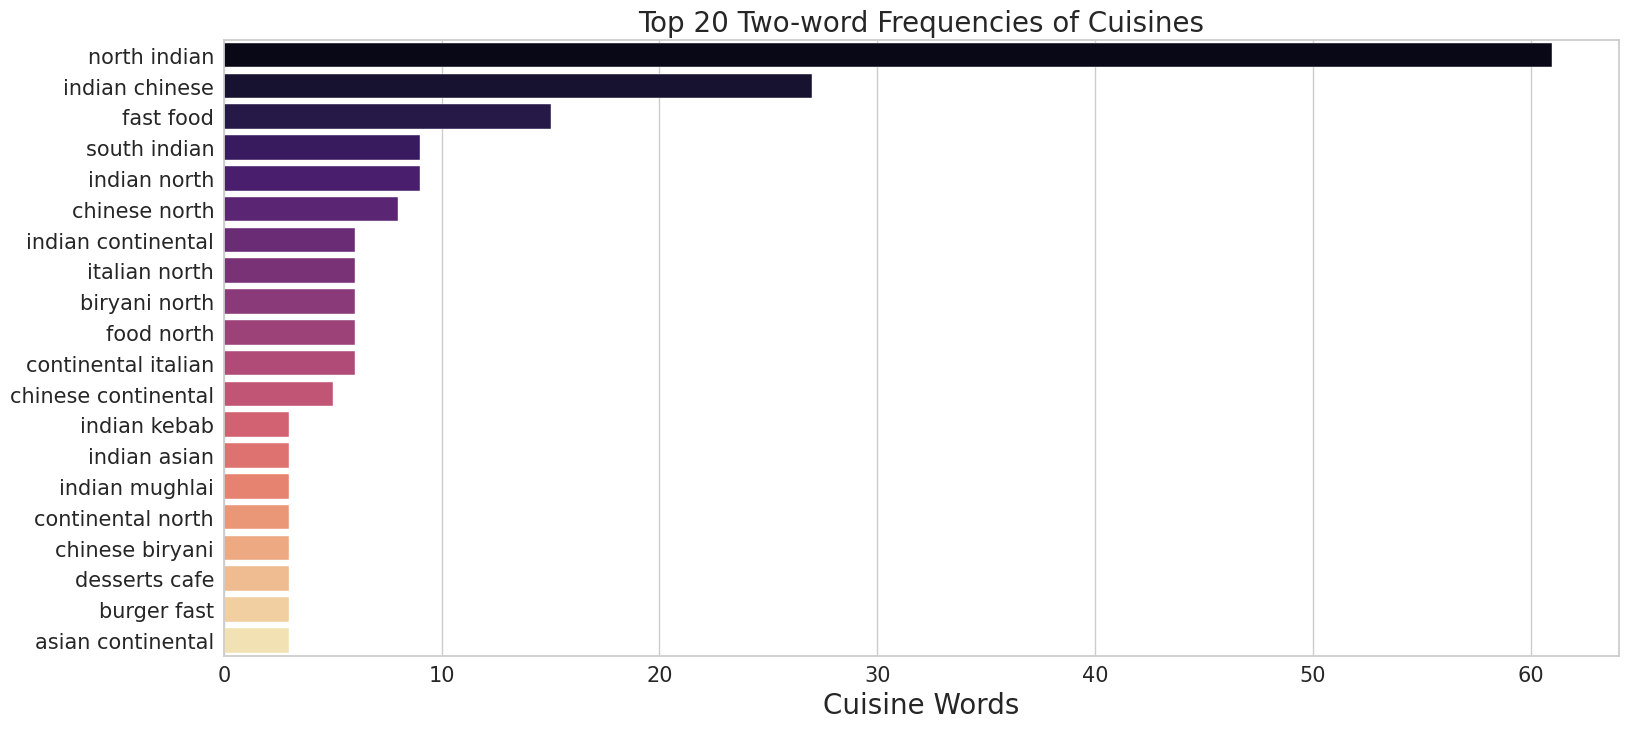

In [406]:
# Chart - 4 visualization code
# Visualizing the frequency of the Cuisines.
sns.set_style("whitegrid")
plt.figure(figsize = (18, 8))
sns.barplot(y = "Cuisine Words", x = "Frequency", data = two_words_20c, palette = "magma")
plt.title("Top 20 Two-word Frequencies of Cuisines", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Cuisine Words", size = 20)
plt.ylabel(None)
plt.savefig("Top_20_Two-word_Frequencies_of_Cuisines.png")
plt.show()

The DataFrame contains two columns: "Cuisine Words" and "Frequency." The "Cuisine Words" column lists the most frequent two-word cuisine terms, while the "Frequency" column shows the number of times each two-word cuisine term appears in the dataset.This information can be helpful in understanding the most common cuisine types in the dataset. It can also be used to identify trends and patterns in the types of cuisines that are popular or in demand among the customers

#### Chart - 5

In [407]:
# Chart - 5 visualization code
# Polting the frequency of the rating on scatter bar plot
import plotly.express as px
fig = px.scatter(rev_df, x=rev_df['Rating'], y=rev_df['Review_length'])
fig.update_layout(title_text="Rating vs Review Length")
fig.update_xaxes(ticks="outside", tickwidth=1, tickcolor='crimson',tickangle=45, ticklen=10)
fig.show()

The scatter plot confirms that length of review doesnt impact ratings.
The scatter plot visualizes the relationship between ratings and review lengths. Key insights include understanding the distribution of ratings, identifying patterns or trends in review lengths, detecting outliers, exploring the correlation between ratings and review lengths, and assessing data sparsity or concentration. The interactive nature of the plot allows for detailed exploration of specific data points.

#### Chart - 6

<Axes: ylabel='Frequency'>

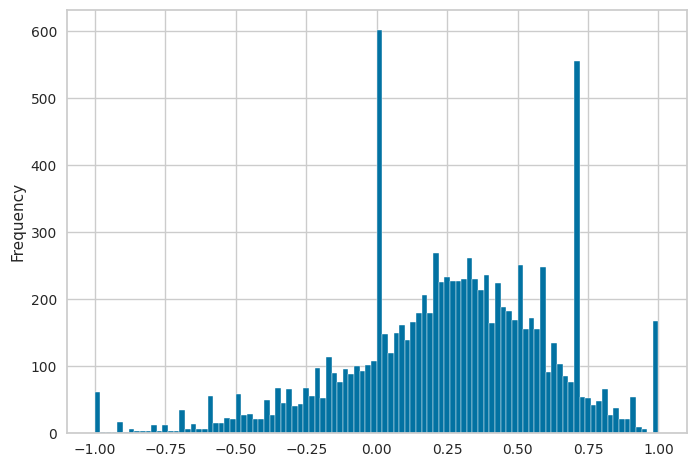

In [408]:
# Chart - 6 visualization code
# Creating polarity variable to see sentiments in reviews.(using textblob)
from textblob import TextBlob
rev_df['Polarity'] = rev_df['Review'].apply(lambda x: TextBlob(x).sentiment.polarity)
# Visualizing the polarity using histogram.
rev_df['Polarity'].plot(kind='hist', bins=100)

Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1].

In [409]:
# Creating argument for stop words.
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

print(stop_words)
rest_word=['order','restaurant','taste','ordered','good','food','table','place','one','also']
rest_word

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

['order',
 'restaurant',
 'taste',
 'ordered',
 'good',
 'food',
 'table',
 'place',
 'one',
 'also']

#### Chart - 7

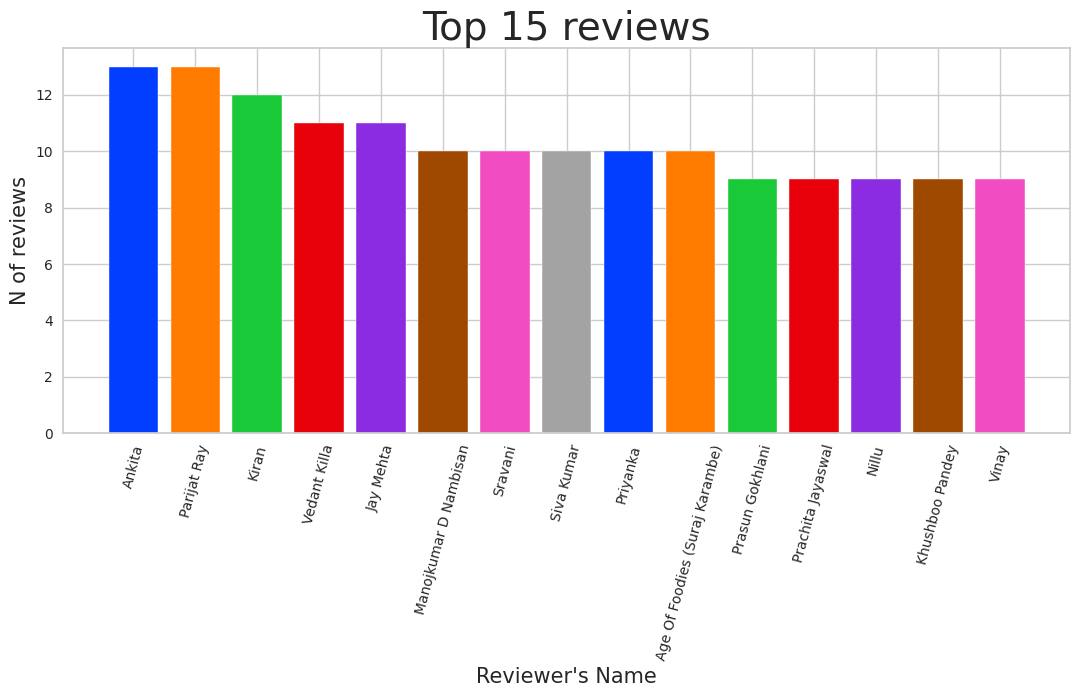

In [410]:
# Chart - 7 visualization code
# We will extrapolate the 15 profiles that have made more reviews.
# Groupby on the basis of rivewer gives the fequency of the reviews
reviewer_list = rev_df.groupby('Reviewer').apply(lambda x: x['Reviewer'].count()).reset_index(name='Review_Count')

# Sorting the frequency of reviews decending
reviewer_list = reviewer_list.sort_values(by = 'Review_Count',ascending=False)
# Selecting the top 15 reviewrs
top_reviewers = reviewer_list[:15]
plt.figure(figsize=(13,5))
plt.bar(top_reviewers['Reviewer'], top_reviewers['Review_Count'], color = sns.color_palette("bright", 8))
plt.xticks(rotation=75)
plt.title('Top 15 reviews',size=28)
plt.xlabel("Reviewer's Name",size=15)
plt.ylabel('N of reviews',size=15)
plt.show()

The bar plot of the top 15 reviewers provides insights into the frequency of reviews contributed by each reviewer, showcasing user engagement, potential influencers, and the platform's reliance on user-generated content. It helps identify key contributors and assess the balance between the quantity and quality of reviews.

#### Chart - 8

In [411]:
# Removing Special characters and punctuation from review columns.
rev_df['Review']=rev_df['Review'].map(lambda x: re.sub('[,\.!?]','', x))
rev_df['Review']=rev_df['Review'].map(lambda x: x.lower())
rev_df['Review']=rev_df['Review'].map(lambda x: x.split())
rev_df['Review']=rev_df['Review'].apply(lambda x: [item for item in x if item not in stop_words])
rev_df['Review']=rev_df['Review'].apply(lambda x: [item for item in x if item not in rest_word])

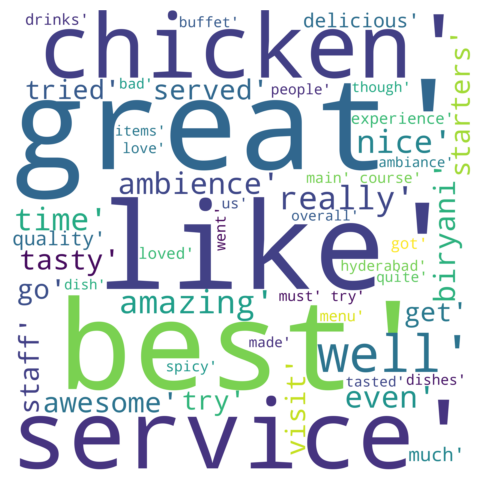

In [412]:
# Chart - 8 visualization code
rev_df['Review']=rev_df['Review'].astype(str)
ps = PorterStemmer()
rev_df['Review']=rev_df['Review'].map(lambda x: ps.stem(x))
long_string = ','.join(list(rev_df['Review'].values))
long_string
wordcloud = WordCloud(width=2160, height= 2160, max_words=50, background_color='white', collocations=True, contour_color='steelblue').generate(long_string)
# Display the generated Word Cloud.
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

Great, Like, Best, Chicken, Service, Ambience, Amazing, time, starters are key to good review.

#### Chart - 10

In [413]:
# Chart - 10 visualization code
# Creating two datasets for positive and negative reviews.
rev_df['Rating']= pd.to_numeric(rev_df['Rating'],errors='coerce')   # The to_numeric() function in pandas is used to convert a pandas object to a numeric type.
pos_rev = rev_df[rev_df.Rating>= 3]
neg_rev = rev_df[rev_df.Rating< 3]

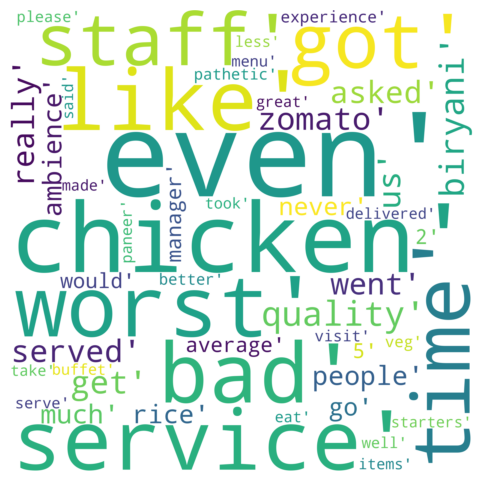

In [414]:
# Negative reviews wordcloud.
long_string = ','.join(list(neg_rev['Review'].values))
long_string
wordcloudd = WordCloud(background_color="white", max_words=50, width=2160, height= 2160, contour_color='steelblue')
wordcloudd.generate(long_string)
plt.figure(figsize=(12,6))
plt.imshow(wordcloudd, interpolation='bilinear')
plt.axis("off");

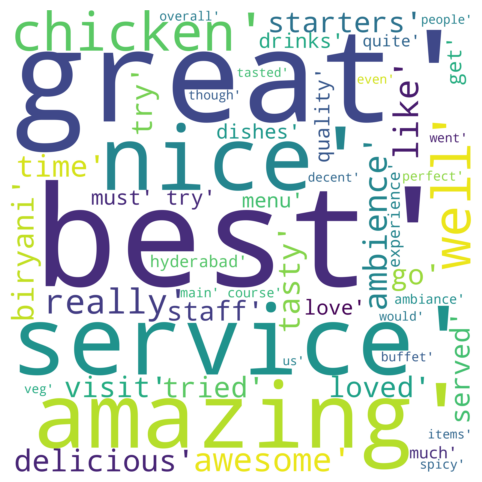

In [415]:
# Positive reviews wordcloud.
long_string = ','.join(list(pos_rev['Review'].values))
long_string
wordcloudd = WordCloud(background_color="white", max_words=50, width=2160, height= 2160, contour_color='steelblue')
wordcloudd.generate(long_string)
plt.figure(figsize=(12,6))
plt.imshow(wordcloudd, interpolation='bilinear')
plt.axis("off");

Dataframe where the Rating column is greater than or equal to 3. This selects all the positive reviews where as the Rating column is less than 3. This selects all the negative reviews, assuming that the Rating column is a scale from 1 to 5 with 5 being the highest rating.

#Text Cleaning

In [416]:
rev_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Review_length,Polarity
0,Beyond Flavours,Rusha Chakraborty,"['ambience', 'quite', 'saturday', 'lunch', 'co...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0.0,222,0.660000
1,Beyond Flavours,Anusha Tirumalaneedi,"['ambience', 'pleasant', 'evening', 'service',...",5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0.0,144,0.606667
2,Beyond Flavours,Ashok Shekhawat,"['must', 'try', 'great', 'great', 'ambience', ...",5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0.0,189,0.540000
3,Beyond Flavours,Swapnil Sarkar,"['soumen', 'das', 'arun', 'great', 'guy', 'beh...",5.0,"1 Review , 1 Follower",5/24/2019 22:11,0.0,148,0.500000
4,Beyond Flavours,Dileep,"['goodwe', 'kodi', 'drumsticks', 'basket', 'mu...",5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0.0,160,0.577500


### Create a corpus of words from the negative reviews in the neg_rev DataFrame.

In [417]:
# Plot for negative reviews.
def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for col in ['Review']:
        for sentence in data[col].iteritems():
            word_list = sentence[1].split(" ")
            corpus.append(word_list)

    return corpus

# Display the first two elements of the corpus list
corpus = build_corpus(neg_rev)
corpus[:1]

[["['corn',",
  "'cheese',",
  "'balls',",
  "'manchow',",
  "'soup',",
  "'paneer',",
  "'shashlik',",
  "'sizzler',",
  "'sizzler',",
  "'stale',",
  "'paneer',",
  "'smelling',",
  "'waiter',",
  "'impolite',",
  "'even',",
  "'accept',",
  "'mistake',",
  "'never',",
  "'going']"]]

### Create a corpus of words from the positive  reviews in the pos_rev DataFrame.

In [418]:
# Plot for postive reviews
def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for col in ['Review']:
        for sentence in data[col].iteritems():
            word_list = sentence[1].split(" ")
            corpus.append(word_list)

    return corpus

# Display the first two elements of the corpus list
corpus = build_corpus(pos_rev)
corpus[0:1]

[["['ambience',",
  "'quite',",
  "'saturday',",
  "'lunch',",
  "'cost',",
  "'effective',",
  "'sate',",
  "'brunch',",
  "'chill',",
  "'friends',",
  "'parents',",
  "'waiter',",
  "'soumen',",
  "'das',",
  "'really',",
  "'courteous',",
  "'helpful']"]]

In [419]:
# Checking
rev_df['Review']

0       ['ambience', 'quite', 'saturday', 'lunch', 'co...
1       ['ambience', 'pleasant', 'evening', 'service',...
2       ['must', 'try', 'great', 'great', 'ambience', ...
3       ['soumen', 'das', 'arun', 'great', 'guy', 'beh...
4       ['goodwe', 'kodi', 'drumsticks', 'basket', 'mu...
                              ...                        
9995    ['madhumathi', 'mahajan', 'well', 'start', 'ni...
9996    ['never', 'disappointed', 'us', 'courteous', '...
9997    ['bad', 'rating', 'mainly', '"chicken', 'bone'...
9998    ['personally', 'love', 'prefer', 'chinese', 'c...
9999    ['checked', 'try', 'delicious', 'chinese', 'se...
Name: Review, Length: 9955, dtype: object

# LDA - Latent Dirichlet Allocation

Topic Modeling using LDA

LDA is one of the methods to assign topic to texts. If observations are words collected into documents, it posits that each document is a mixture of a small number of topics and that each word's presence is attributable to one of the document's topics.


Plotting the top 10 most occuring words. Topic modeling is a process to automatically identify topics present in a text object and to assign text corpus to one category of topic.


In [420]:
# Tokenize the documents
tokenized_docs = [simple_preprocess(doc) for doc in rev_df['Review']]

# Create a dictionary from the tokenized documents
dictionary = corpora.Dictionary(tokenized_docs)

# Convert the tokenized documents to a bag-of-words corpus
bow_corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

# Train an LDA model on the bag-of-words corpus
num_topics = 10  # The number of topics to extract
lda_model = LdaModel(bow_corpus, num_topics=num_topics, id2word=dictionary, passes=10)

# Print the topics and their top 10 terms
for topic in lda_model.show_topics(num_topics=num_topics, num_words=10, formatted=False):
    print('Topic {}: {}'.format(topic[0], ', '.join([term[0] for term in topic[1]])))

Topic 0: veg, chicken, paneer, rice, quantity, biryani, non, less, noodles, like
Topic 1: service, even, time, bad, experience, worst, zomato, us, never, get
Topic 2: momos, service, mark, interiors, slow, chai, upto, improve, ambience, really
Topic 3: delivery, biryani, delivered, time, packing, packaging, late, received, paratha, dum
Topic 4: chicken, well, try, fish, really, tasted, tried, spicy, best, served
Topic 5: chocolate, cake, burger, coffee, cream, ice, pork, cheese, donuts, like
Topic 6: shawarma, min, spicy, royal, raan, charged, crazy, burnt, cover, blowing
Topic 7: ambience, great, service, best, pizza, amazing, music, buffet, drinks, go
Topic 8: service, nice, great, staff, awesome, ambience, visit, really, best, time
Topic 9: excellent, job, wild, manchow, nuggets, american, cookies, burgers, shorba, always


In [421]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[bow_corpus]):
    topic_weights.append([w[1] for w in row_list])


# Array of topic weights
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 10
import matplotlib.colors as mcolors
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics),
              width=900, height=700)  # Use 'width'

plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 8764 samples in 0.016s...
[t-SNE] Computed neighbors for 8764 samples in 0.539s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8764
[t-SNE] Computed conditional probabilities for sample 2000 / 8764
[t-SNE] Computed conditional probabilities for sample 3000 / 8764
[t-SNE] Computed conditional probabilities for sample 4000 / 8764
[t-SNE] Computed conditional probabilities for sample 5000 / 8764
[t-SNE] Computed conditional probabilities for sample 6000 / 8764
[t-SNE] Computed conditional probabilities for sample 7000 / 8764
[t-SNE] Computed conditional probabilities for sample 8000 / 8764
[t-SNE] Computed conditional probabilities for sample 8764 / 8764
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.288284
[t-SNE] KL divergence after 1000 iterations: 0.925542




The visualization provides insights into how documents with different dominant topics are spatially distributed in the reduced 2D space.

This type of visualization is useful for understanding the relationships and separations between different topics in the context of the t-SNE representation. It allows for an interactive exploration of document clustering based on LDA topic weights.

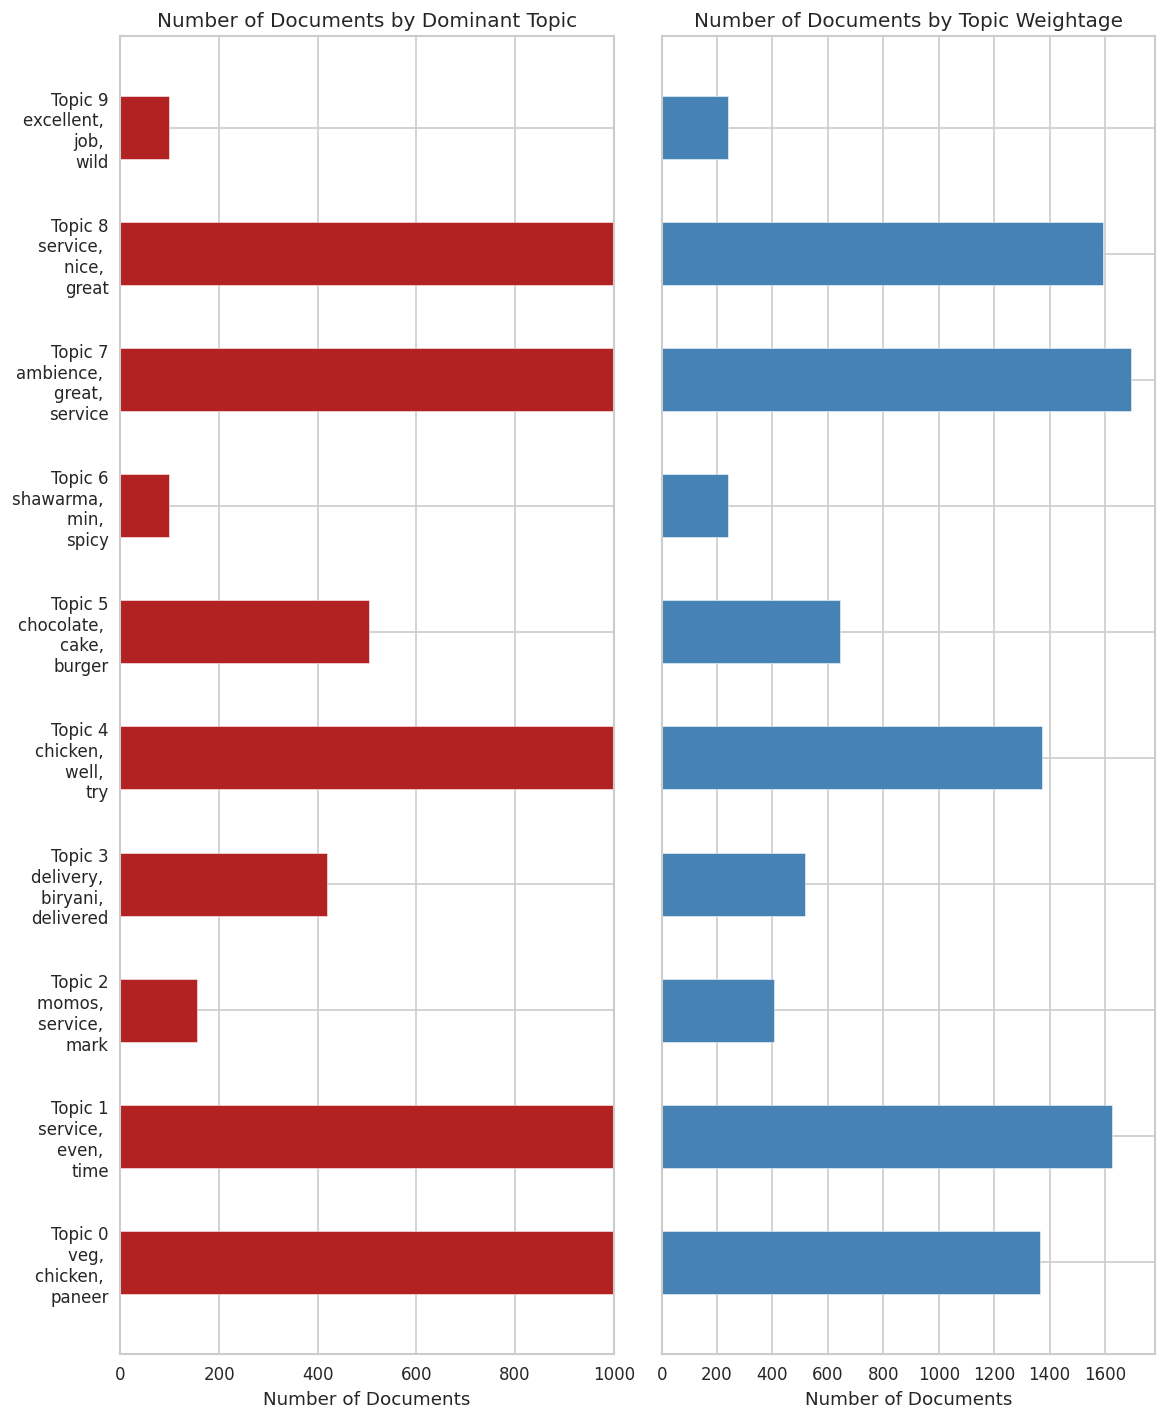

In [422]:
# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs = model[corp] if isinstance(model, gensim.models.LdaModel) else model.get_document_topics(corp)
        dominant_topic = sorted(topic_percs, key=lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=bow_corpus, end=-1)

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False)
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 12), dpi=120, sharey=True)

from matplotlib.ticker import FuncFormatter

# Horizontal bar plot for Number of Documents by Dominant Topic
ax1.barh(y='Dominant_Topic', width='count', data=df_dominant_topic_in_each_doc, height=0.5, color='firebrick')
ax1.set_yticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x) + '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.yaxis.set_major_formatter(tick_formatter)

ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=12))
ax1.set_xlabel('Number of Documents')
ax1.set_xlim(0, 1000)

# Horizontal bar plot for Number of Documents by Topic Weightage
ax2.barh(y='index', width='count', data=df_topic_weightage_by_doc, height=0.5, color='steelblue')
ax2.set_yticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.yaxis.set_major_formatter(tick_formatter)

ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=12))
ax2.set_xlabel('Number of Documents')

plt.tight_layout()
plt.show()

Certainly! Here are concise insights you might gain from the visualization:

**Number of Documents by Dominant Topic:**
- Distribution of documents across different dominant topics.
- Identification of prevalent topics in the dataset.
- Understanding the dominance of specific themes.

**Number of Documents by Topic Weightage:**
- Insight into the diversity or concentration of topics.
- Understanding how focused or varied documents are in terms of overall topic weightage.

**Top Words for Each Topic:**
- Identification of key terms associated with each topic.
- Interpretation and labeling of topics based on representative terms.
- Understanding common themes or keywords in each topic.

**Topic Distribution Insights:**
- Patterns or trends in the overall distribution of topics.
- Detection of prevalent topics in specific sections, periods, or document types.
- Identification of outliers or anomalies indicating interesting subsets of documents.

## Sentiment Analysis


In [423]:
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import plotly.express as px


In [424]:
# Create a function to get the subjectivity
def subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [425]:
# Create a function to get the polarity
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [426]:
# Applying subjectivity and the polarity function to the respective columns
rev_df['Subjectivity'] = rev_df['Review'].apply(subjectivity)
rev_df['Polarity'] = rev_df['Review'].apply(polarity)

In [427]:
# Checking for created feature
rev_df['Polarity']


0       0.600000
1       0.733333
2       0.540000
3       0.800000
4       0.350000
          ...   
9995    0.277841
9996    0.174621
9997    0.082074
9998    0.560000
9999    0.103030
Name: Polarity, Length: 9955, dtype: float64

In [428]:
# Checking for created feature
rev_df['Subjectivity']

0       0.900000
1       0.966667
2       0.740000
3       0.750000
4       0.450000
          ...   
9995    0.646591
9996    0.710606
9997    0.501252
9998    0.620000
9999    0.630303
Name: Subjectivity, Length: 9955, dtype: float64

In [429]:
# Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
    if score <0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

If the score is less than 0, the function returns the string 'Negative'. If the score is equal to 0, the function returns the string 'Neutral'. If the score is greater than 0, the function returns the string 'Positive'.

In [430]:
# Apply get analysis function to separate the sentiments from the column
rev_df['Analysis'] = rev_df['Polarity'].apply(getAnalysis)

In [431]:
# plot the polarity and subjectivity
fig = px.scatter(rev_df,
                 x='Polarity',
                 y='Subjectivity',
                 color = 'Analysis',
                 size='Subjectivity')

In [432]:
# Add a vertical line at x=0 for Netural Reviews
fig.update_layout(title='Sentiment Analysis',
                  shapes=[dict(type= 'line',
                               yref= 'paper', y0= 0, y1= 1,
                               xref= 'x', x0= 0, x1= 0,
                               line=dict(color='red'))])
fig.show()

#Providing a snapshot of the above chart here as well because result after execution is not visible in github.


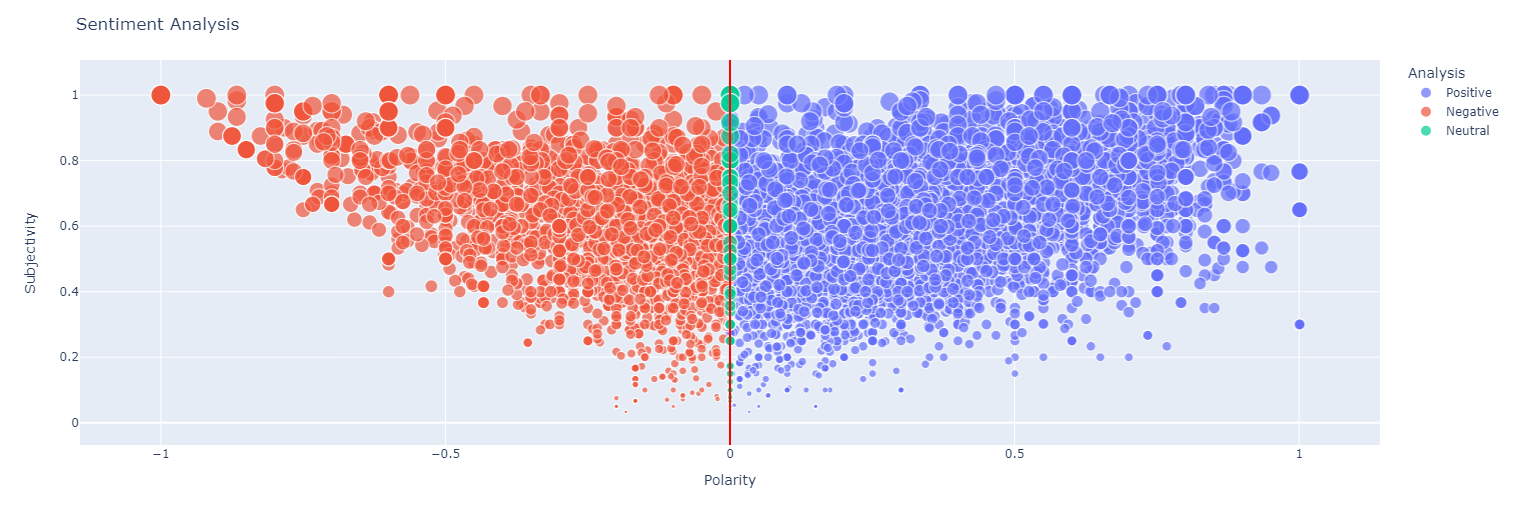

In natural language processing and sentiment analysis:

1. **Polarity:**
   - **Definition:** Polarity measures the degree of positivity, negativity, or neutrality in a text.
   - **Scale:** Typically ranges from negative (e.g., -1) to positive (e.g., 1), with 0 indicating neutrality.
   - **Insight:** Indicates the overall sentiment expressed in a text, whether it's positive, negative, or neutral.

2. **Subjectivity:**
   - **Definition:** Subjectivity measures the degree to which a text expresses personal opinions, emotions, or biases.
   - **Scale:** Ranges from objective (e.g., 0) to subjective (e.g., 1).
   - **Insight:** Reflects how much of the content is based on personal feelings or opinions rather than factual information. Higher subjectivity implies a more subjective or opinionated text.

The resulting plot is providing several insights into the sentiment analysis results. Firstly, the histogram bars on the left side of the plot (negative polarity) indicate that a significant number of reviews expressed negative sentiments. Similarly, the histogram bars on the right side of the plot (positive polarity) indicate that a significant number of reviews expressed positive sentiments.

Overall, this plot is providing a quick and easy way to visualize the sentiment polarity distribution of the reviews, which can help in understanding the overall sentiment of the customers towards the restaurants.

# Clustering

In [433]:
warnings.filterwarnings("ignore", category=DeprecationWarning);

In [434]:
meta_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...",chinese continental kebab european south india...,"12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,biryani north indian chinese,11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,1300,"Great Buffets, Hyderabad's Hottest",asian mediterranean north indian desserts,"11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,biryani north indian chinese seafood beverages,12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,1200,"Best Bars & Pubs, Food Hygiene Rated Restauran...",asian continental north indian chinese mediter...,"12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [435]:
# converting the cuisines to lower case
meta_df_res['Cuisines'] = meta_df_res['Cuisines'].apply(lambda x : x.lower());
# Separating the Name, cost and cuisines column.
cuisine_df = meta_df_res.loc[:,['Name','Cost','Cuisines']]

In [436]:
# Overview of separated variables.
cuisine_df.head()

,Name,Cost,Cuisines
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i..."
1,Paradise,800,"biryani, north indian, chinese"
2,Flechazo,"1,300","asian, mediterranean, north indian, desserts"
3,Shah Ghouse Hotel & Restaurant,800,"biryani, north indian, chinese, seafood, bever..."
4,Over The Moon Brew Company,"1,200","asian, continental, north indian, chinese, med..."


In [437]:
# Removing spces from cuisine column.
cuisine_df['Cuisines'] = cuisine_df['Cuisines'].str.replace(' ','')

# Spliting the Words in cuisine.
cuisine_df['Cuisines'] = cuisine_df['Cuisines'].str.split(',')

In [438]:
# Overview on text cleaning.
cuisine_df.head()

,Name,Cost,Cuisines
0,Beyond Flavours,800,"[chinese, continental, kebab, european, southi..."
1,Paradise,800,"[biryani, northindian, chinese]"
2,Flechazo,"1,300","[asian, mediterranean, northindian, desserts]"
3,Shah Ghouse Hotel & Restaurant,800,"[biryani, northindian, chinese, seafood, bever..."
4,Over The Moon Brew Company,"1,200","[asian, continental, northindian, chinese, med..."


In [439]:
from sklearn.preprocessing import MultiLabelBinarizer

# converting a list of labels for each sample into a binary indicator matrix
mlb = MultiLabelBinarizer(sparse_output=True)

In [440]:

# converting the Cuisines column in the cuisine_df DataFrame into a binary indicator matrix.
cuisine_df = cuisine_df.join(pd.DataFrame.sparse.from_spmatrix(mlb.fit_transform(cuisine_df.pop('Cuisines')),
                                                               index=cuisine_df.index, columns=mlb.classes_))

In [441]:
# Checking the unique for rating.
rev_df['Rating'].unique()

array([5. , 4. , 1. , 3. , 2. , 3.5, 4.5, 2.5, 1.5, 3.6])

In [442]:
# Remove nan rating in Rating column.
rev_df.dropna(subset=['Rating'],inplace=True)

# Change data type of rating column to float.
rev_df['Rating']= rev_df['Rating'].astype('float')

In [443]:
# Dropping the null Values from review column.
rev_df.dropna(subset =['Review'], inplace=True)

In [444]:
# Grouping the restaurant on the basis of average rating.
ratings_df = rev_df.groupby('Restaurant')['Rating'].mean().reset_index()

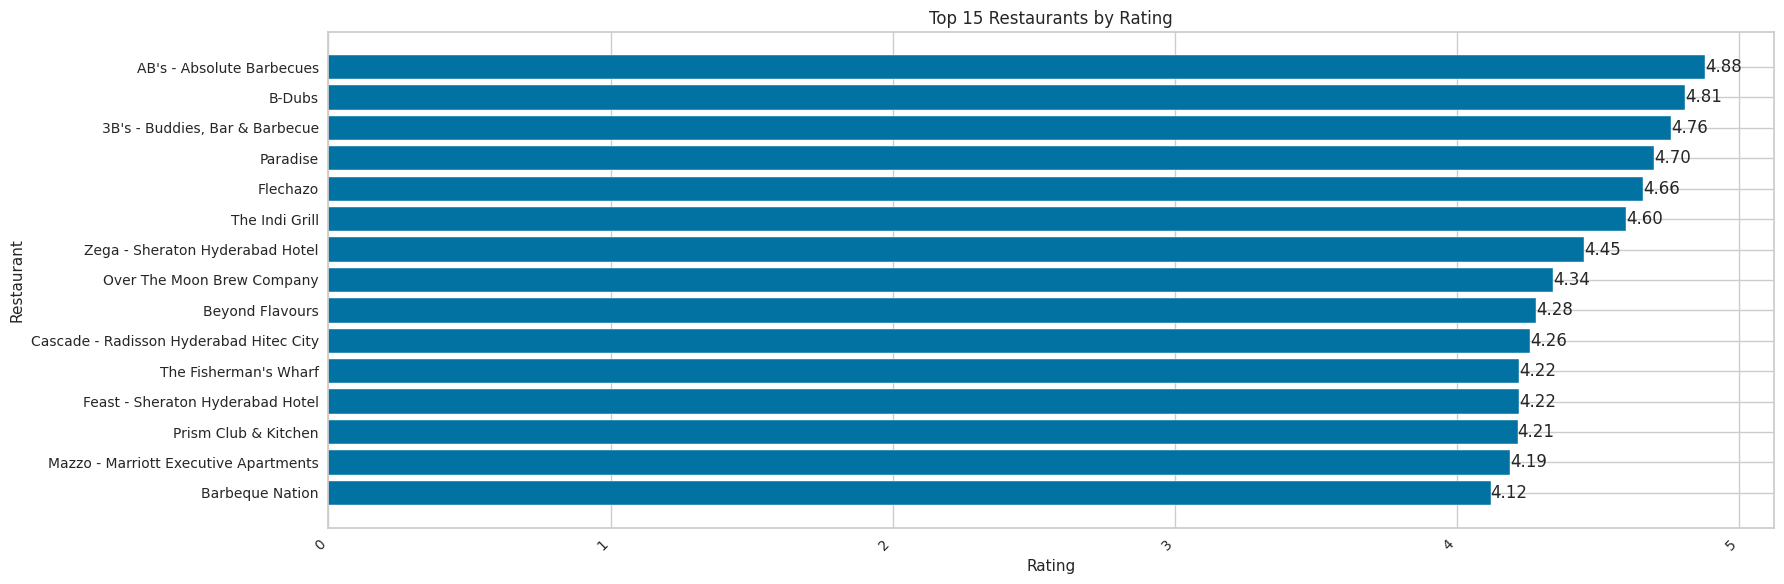

In [445]:
# Top highly rated 15 restaurants.
# Sort by 'Rating' in descending order and select the top 15 rows
top_ratings = ratings_df.sort_values(by='Rating', ascending=False).head(15)
top_ratings = top_ratings[::-1]
# Plotting the bar graph
plt.figure(figsize=(18, 6))  # Adjust the figure size as needed
bars=plt.barh(top_ratings['Restaurant'], top_ratings['Rating'])
plt.xlabel('Rating')
plt.ylabel('Restaurant')
plt.title('Top 15 Restaurants by Rating')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
# Annotating bars with their respective ratings
for bar, rating in zip(bars, top_ratings['Rating']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{rating:.2f}', va='center')
plt.tight_layout()  # Adjust layout for better visualization
plt.show()

In [446]:
ratings_df.head(2)

,Restaurant,Rating
0,10 Downing Street,3.80
1,13 Dhaba,3.48


In [447]:
cuisine_df.head(2)

,Name,Cost,american,andhra,arabian,asian,bakery,bbq,beverages,biryani,...,northindian,pizza,salad,seafood,southindian,spanish,streetfood,sushi,thai,wraps
0,Beyond Flavours,800,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,Paradise,800,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [448]:
#  Combining the information on restaurant cuisine and ratings into a single DataFrame.
df_cluster = cuisine_df.merge(ratings_df, left_on='Name',right_on='Restaurant')
df_cluster.head()

,Name,Cost,american,andhra,arabian,asian,bakery,bbq,beverages,biryani,...,salad,seafood,southindian,spanish,streetfood,sushi,thai,wraps,Restaurant,Rating
0,Beyond Flavours,800,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,Beyond Flavours,4.28
1,Paradise,800,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,Paradise,4.70
2,Flechazo,"1,300",0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,Flechazo,4.66
3,Shah Ghouse Hotel & Restaurant,800,0,0,0,0,0,0,1,1,...,0,1,0,0,0,0,0,0,Shah Ghouse Hotel & Restaurant,3.21
4,Over The Moon Brew Company,"1,200",0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,Over The Moon Brew Company,4.34


In [449]:
columns_list= list(df_cluster.columns)
columns_lists = sorted(columns_list, key= lambda x: x.lower())
columns_lists

['american',
 'andhra',
 'arabian',
 'asian',
 'bakery',
 'bbq',
 'beverages',
 'biryani',
 'burger',
 'cafe',
 'chinese',
 'continental',
 'Cost',
 'desserts',
 'european',
 'fastfood',
 'fingerfood',
 'goan',
 'healthyfood',
 'hyderabadi',
 'icecream',
 'indonesian',
 'italian',
 'japanese',
 'juices',
 'kebab',
 'lebanese',
 'malaysian',
 'mediterranean',
 'mexican',
 'mithai',
 'modernindian',
 'momos',
 'mughlai',
 'Name',
 'northeastern',
 'northindian',
 'pizza',
 'Rating',
 'Restaurant',
 'salad',
 'seafood',
 'southindian',
 'spanish',
 'streetfood',
 'sushi',
 'thai',
 'wraps']

In [450]:
# Changing name and order of columns
# As per our convenience
df_cluster.columns
df_cluster = df_cluster[['Name', 'Cost','Rating', 'american', 'andhra', 'arabian', 'asian', 'bbq',
       'bakery', 'beverages', 'biryani', 'burger', 'cafe', 'chinese',
       'continental', 'desserts', 'european', 'fastfood', 'fingerfood', 'goan',
       'healthyfood', 'hyderabadi', 'icecream', 'indonesian', 'italian',
       'japanese', 'juices', 'kebab', 'lebanese', 'malaysian', 'mediterranean',
       'mexican', 'mithai', 'modernindian', 'momos', 'mughlai', 'northeastern',
       'northindian', 'pizza', 'salad', 'seafood', 'southindian', 'spanish',
       'streetfood', 'sushi', 'thai', 'wraps']]

In [451]:
# Checking the data type and null counts for newly created variables.
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 47 columns):
 #   Column         Non-Null Count  Dtype           
---  ------         --------------  -----           
 0   Name           100 non-null    object          
 1   Cost           100 non-null    object          
 2   Rating         100 non-null    float64         
 3   american       100 non-null    Sparse[int64, 0]
 4   andhra         100 non-null    Sparse[int64, 0]
 5   arabian        100 non-null    Sparse[int64, 0]
 6   asian          100 non-null    Sparse[int64, 0]
 7   bbq            100 non-null    Sparse[int64, 0]
 8   bakery         100 non-null    Sparse[int64, 0]
 9   beverages      100 non-null    Sparse[int64, 0]
 10  biryani        100 non-null    Sparse[int64, 0]
 11  burger         100 non-null    Sparse[int64, 0]
 12  cafe           100 non-null    Sparse[int64, 0]
 13  chinese        100 non-null    Sparse[int64, 0]
 14  continental    100 non-null    Sparse[int64

In [452]:
# Removing commas from the cost variables.
df_cluster.Cost= df_cluster.Cost.str.replace(',','')

In [453]:
# Changing the data type of the cost column.
df_cluster.Cost= df_cluster.Cost.astype('float')

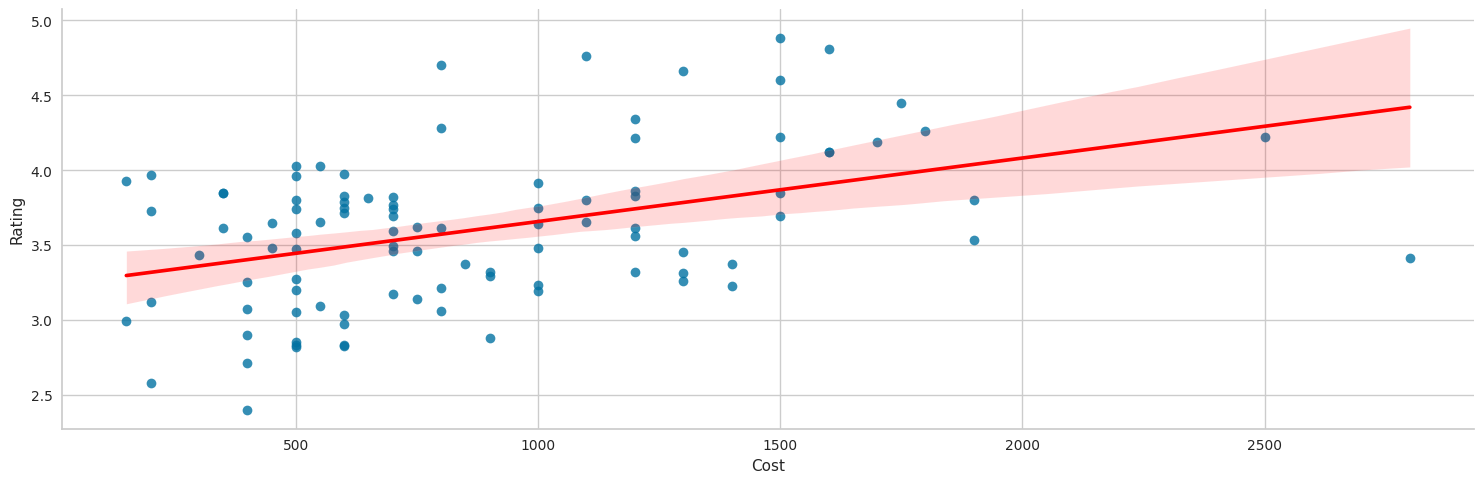

In [454]:
# Visualising relationship between the cost of a meal and the rating of a restaurant
sns.lmplot(y='Rating',x='Cost',data=df_cluster,line_kws={'color' :'red'},height=5, aspect=24/8)

The resulting plot shows the relationship between the cost of a meal and the rating of a restaurant, with the regression line indicating the general trend in the data. This can help identify any patterns or correlations between cost and rating.

# K-means Clustering

In [455]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer

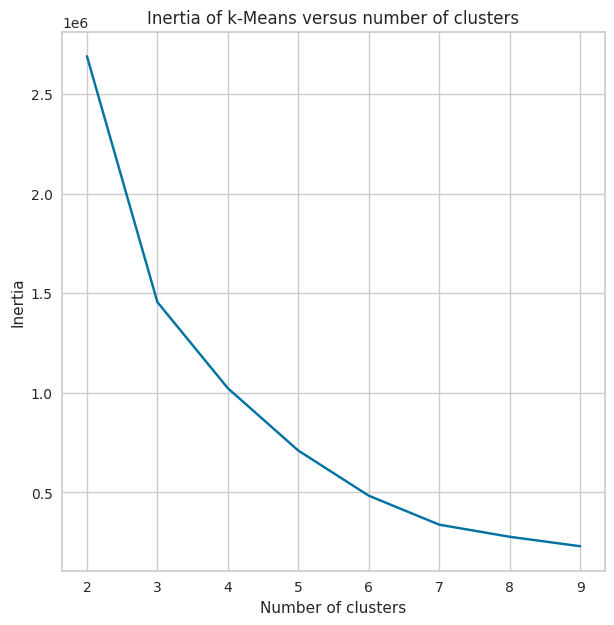

In [456]:
# Create a list of intertia scores for different numbers of clusters
scores = [KMeans(n_clusters=i+2, random_state=42).fit(df_cluster.drop('Name',axis=1)).inertia_
          for i in range(2,10)]

# Create a line plot of inertia scores versus number of clusters
plt.figure(figsize=(7,7))
sns.lineplot(x=np.arange(2, 10), y=scores)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Inertia of k-Means versus number of clusters')
plt.show()

The plot can help to identify the optimal number of clusters based on the elbow point of the curve, where the rate of decrease in inertia score slows down significantly.

In [457]:
# Initializing a K-Means clustering model with number of clusters and random state.
model = KMeans(random_state=11, n_clusters=6)
model.fit(df_cluster.drop('Name',axis=1))

KMeans(n_clusters=6, random_state=11)

In [458]:
# predict the cluster label of a new data point based on a trained clustering model.
cluster_lbl = model.predict(df_cluster.drop('Name',axis=1))
cluster_lbl

array([4, 4, 0, 4, 0, 2, 1, 5, 0, 5, 1, 2, 4, 0, 2, 1, 1, 1, 2, 1, 1, 2,
       2, 5, 2, 0, 0, 0, 1, 5, 4, 0, 4, 4, 2, 4, 4, 1, 0, 4, 0, 1, 1, 1,
       0, 4, 2, 4, 1, 1, 4, 1, 1, 0, 5, 4, 3, 1, 5, 5, 0, 0, 1, 4, 1, 2,
       4, 0, 2, 2, 0, 0, 0, 1, 1, 4, 5, 4, 0, 4, 1, 1, 4, 1, 4, 5, 1, 1,
       1, 5, 2, 2, 3, 1, 1, 1, 1, 2, 1, 0], dtype=int32)

In [459]:
df_cluster['labels'] = cluster_lbl

In [460]:
# Creating the data frame for each cluster.
cluster_0 = df_cluster[df_cluster['labels'] == 0].reset_index()
cluster_1 = df_cluster[df_cluster['labels'] == 1].reset_index()
cluster_2 = df_cluster[df_cluster['labels'] == 2].reset_index()
cluster_3 = df_cluster[df_cluster['labels'] == 3].reset_index()
cluster_4 = df_cluster[df_cluster['labels'] == 4].reset_index()
cluster_5 = df_cluster[df_cluster['labels'] == 5].reset_index()

list_of_cluster=[cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5]

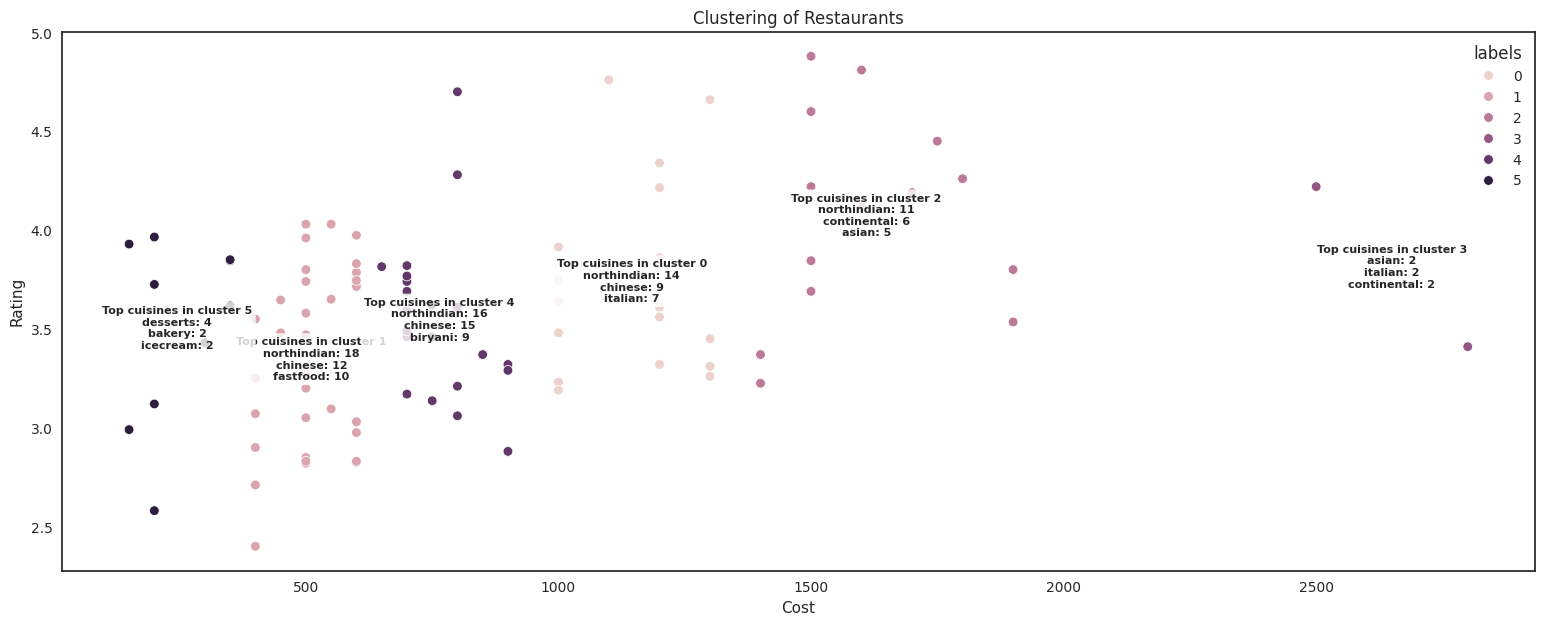

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


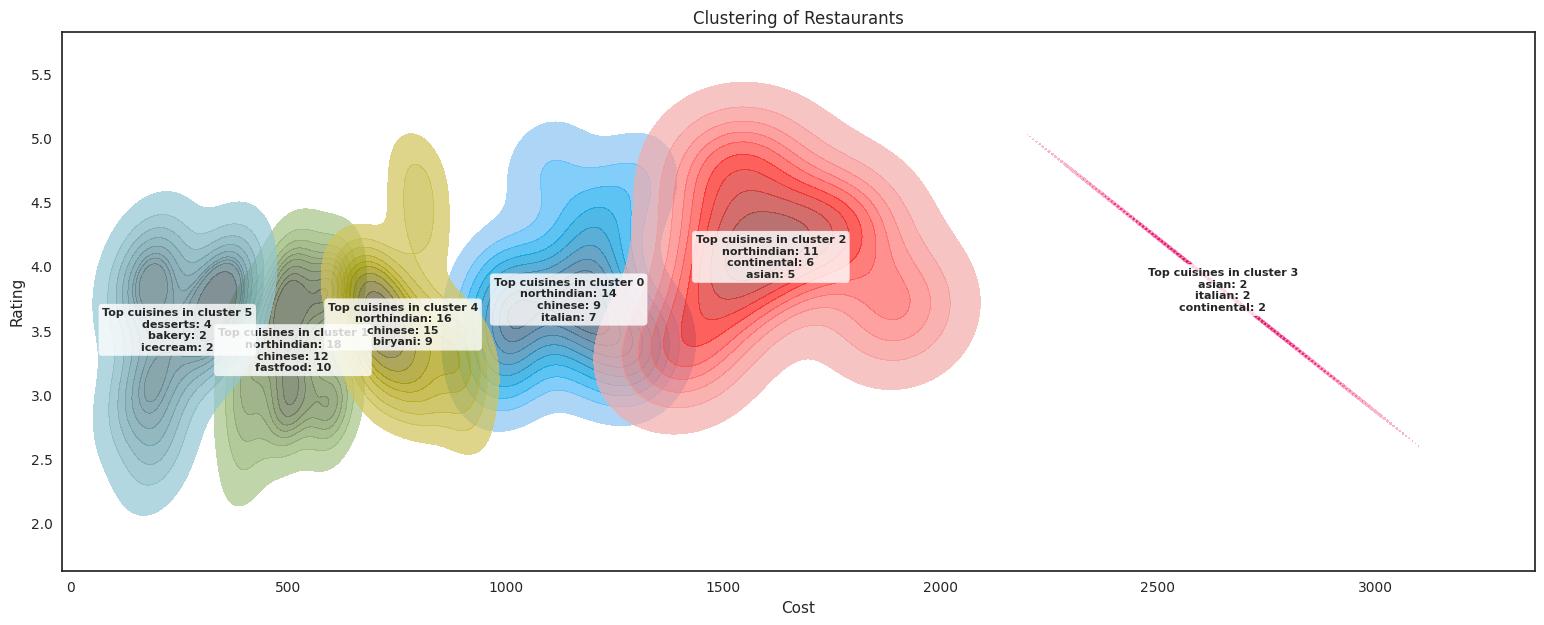

In [461]:
# Visualization
# Add annotations for top cuisines in each cluster
def stands():
  for i, df in enumerate(list_of_cluster):
    top_cuisines = df.drop(['index', 'Name', 'Cost', 'Rating', 'labels'], axis=1).sum().sort_values(ascending=False)[:3]
    top_cuisines_str = '\n'.join([f'{cuisine}: {count}' for cuisine, count in top_cuisines.items()])
    plt.annotate(f'Top cuisines in cluster {i}\n{top_cuisines_str}',
                 xy=(df['Cost'].mean(), df['Rating'].mean()),
                 ha='center', va='center', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),fontsize=8,weight='bold')

# Create a scatter plot of the clusters with annotations for top cuisines
plt.figure(figsize=(19,7))
sns.set_style('white')
sns.scatterplot(x='Cost', y='Rating', hue='labels', data=df_cluster)
stands()
plt.xlabel('Cost')
plt.ylabel('Rating')
plt.title('Clustering of Restaurants')
plt.show()

print(60*("\033[1m-*-"))

# Iterate through clusters and plot kernel density estimate for each cluster
plt.figure(figsize=(19,7))
sns.set_style('white')
for i, df in enumerate(list_of_cluster):
    sns.kdeplot(x='Cost', y='Rating', data=df, fill=True, label=f'Cluster {i}', alpha=0.7)
plt.xlabel('Cost')
plt.ylabel('Rating')
plt.title('Clustering of Restaurants')
stands()
plt.show()


The charts and visualizations created serve several purposes in data analysis and interpretation:

1. **Cluster Analysis:** The scatter plot with clusters helps identify groups of restaurants based on their cost and rating. This clustering allows you to categorize restaurants with similar characteristics.

2. **Top Cuisines:** The annotations for top cuisines in each cluster provide additional information about the types of cuisines that dominate each group. This can help in understanding the culinary preferences associated with different clusters.

3. **Kernel Density Estimate (KDE):** The KDE plot overlays the density distribution of restaurants in each cluster. This visualization can highlight the concentration of data points, giving insights into the density of high-rated and low-cost restaurants in different clusters.

4. **Insights into Restaurant Characteristics:** By combining cost, rating, and cuisine information, these visualizations offer insights into the characteristics of restaurants in each cluster. This can be valuable for decision-making in various domains, such as marketing, business strategy, or customer targeting.

Overall, these visualizations are capable of  exploring and communicating patterns and trends in data. They make it easier for analysts and stakeholders to grasp complex relationships within the dataset and derive meaningful insights.

In [462]:
# Top cuisines in each cluster
for i,df in enumerate(list_of_cluster):
  print(f'Top cuisines in cluster {i}\n', df.drop(['index','Name','Cost','Rating','labels'],axis=1).sum().sort_values(ascending=False)[:3],'\n')

Top cuisines in cluster 0
 northindian    14
chinese         9
italian         7
dtype: int64 

Top cuisines in cluster 1
 northindian    18
chinese        12
fastfood       10
dtype: int64 

Top cuisines in cluster 2
 northindian    11
continental     6
asian           5
dtype: int64 

Top cuisines in cluster 3
 asian          2
italian        2
continental    2
dtype: int64 

Top cuisines in cluster 4
 northindian    16
chinese        15
biryani         9
dtype: int64 

Top cuisines in cluster 5
 desserts    4
bakery      2
icecream    2
dtype: int64 



# **Conclusion**

- **Clustering Success:**
  - The project successfully grouped restaurants based on key features like cost and rating.
  - The clusters revealed distinct patterns, such as some clusters being dominated by specific cuisines.

- **Sentiment Analysis Insights:**
  - The sentiment analysis component provided a deeper understanding of user reviews.
  - Businesses can leverage sentiment insights to tailor services and enhance user experience.

- **Exploring Clustering Results:**
  - **Cluster 0:**
    - Dominated by North Indian cuisine with 14 instances.
    - Also includes Chinese and Italian cuisines.

  - **Cluster 1:**
    - North Indian cuisine is prominent with 18 instances.
    - Chinese and Fast Food are also popular in this cluster.

  - **Cluster 2:**
    - North Indian cuisine leads with 11 instances.
    - Continental and Asian cuisines are also notable.

  - **Cluster 3:**
    - Diversity in Asian, Italian, and Continental cuisines with 2 instances each.

  - **Cluster 4:**
    - North Indian and Chinese cuisines dominate with 16 and 15 instances, respectively.
    - Biryani is also well-represented with 9 instances.

  - **Cluster 5:**
    - Sweets and desserts are prominent with 4 instances.
    - Bakery and ice cream also contribute to this cluster.

- **Potential Areas for Future Work:**
  - Implementing Advanced Techniques:
    - Exploring more advanced clustering algorithms can refine the grouping of restaurants.
    - Incorporating state-of-the-art sentiment analysis techniques can provide richer insights.

  - Feature Expansion:
    - Adding more features, such as images and menus, can offer a comprehensive view of restaurants.
  
  - Relationship Exploration:
    - Investigating the connections between clustering results and sentiment analysis findings can reveal nuanced patterns.

This comprehensive approach positions the project for future enhancements, emphasizing its impact on both user decision-making and business strategies.